# Importing Libraires

In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Divided Dataset into training and testing data

In [21]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

# Creating a Convolutional neural network

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,input_shape=(100,),activation="softmax")
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5156 - accuracy: 0.8484
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1690 - accuracy: 0.9509
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1227 - accuracy: 0.9631
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0962 - accuracy: 0.9720
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0832 - accuracy: 0.9738
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0737 - accuracy: 0.9766
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0646 - accuracy: 0.9793
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0598 - accuracy: 0.9803
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0544 - accuracy: 0.9831
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.052

In [23]:
model.evaluate(x_test,y_test) #evaluating the model

313/313 [==============================] - 1s 1ms/step - loss: 0.0795 - accuracy: 0.9792


[0.07953859120607376, 0.979200005531311]

In [24]:
y_predicted = model.predict(x_test) #storing the preditcion of the model

In [25]:
y_prediced_int = [np.argmax(i) for i in y_predicted] #converting the y_predicted data into the int values
model.save('model.h5')

# Representation of Confusion Matrix

Text(69.0, 0.5, 'Truth')

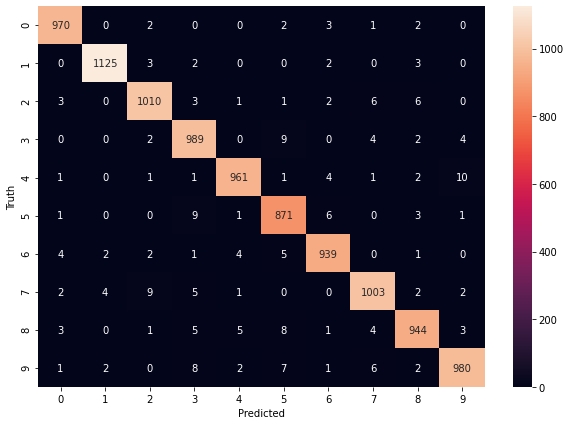

In [26]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_prediced_int)
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')